#### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Loading Dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head(5)

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex,ChestPainType,RestingECG,ExerciseAngina,Slope
0,0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,4,54,150,195,0,122,0.0,0,1,2,1,0,2


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex,ChestPainType,RestingECG,ExerciseAngina,Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2


In [4]:
data.shape

(918, 12)

#### Feature's information
1. Age: Age of patients.
2. sex: Gender of patients. (1: Male, 0: Female)
3. ExerciseAngina: Exercise induced angina. (0: No, 1: Yes)
4. RestingBP: Resting Blood Pressure. (in mm Hg)
5. Cholesterol: Cholesterol in mg/dl. (fetched via BMI sensor)
6. FastingBS: Fasting Blood sugar > 120 mg/dl. (1: True, 0: Otherwise)
7. MaxHR: Maximum Heart Rate.
8. OldPeak: Previous peak.
9. ChestPainType: Chest pain type. (ATA: 1, NAP: 2, ASY: 0, TA: 3) {ATA: Atypical angina, NAP: Non-anginal pain, ASY: Asymptomatic pain, TA: Typical angina pain}
10. RestingECG: resting ecg results. (1: Normal, 2: ST, 0: LVH)
11. Slope: slope. (Flat: 1, Up: 2, Down: 0)
12. HeartDisease: (1: Heavy chances, 0: Less chances)

#### Data Cleaning/ Data preprocessing

In [5]:
print("Duplicate rows:",data.duplicated().sum())
print("Null values:", data.isnull().sum().sum())

Duplicate rows: 0
Null values: 0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0


In [7]:
profile = ProfileReport(data)
profile.to_file('Initial Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina',
       'Slope'],
      dtype='object')

#### Outlier Detection

<AxesSubplot:xlabel='Age'>

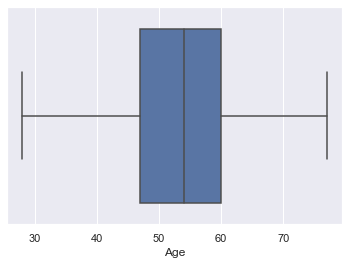

In [9]:
sns.boxplot(x = data.Age)

<AxesSubplot:xlabel='Slope'>

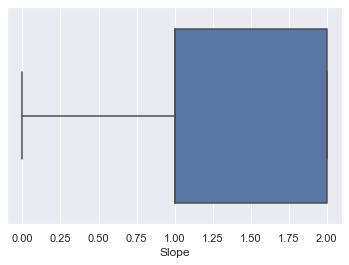

In [10]:
sns.boxplot(x = data.Slope)

<AxesSubplot:xlabel='ExerciseAngina'>

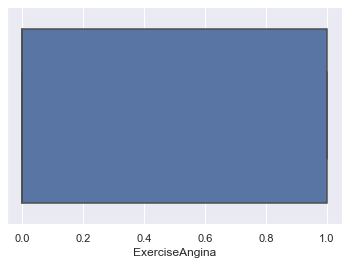

In [11]:
sns.boxplot(x = data.ExerciseAngina)

<AxesSubplot:xlabel='RestingECG'>

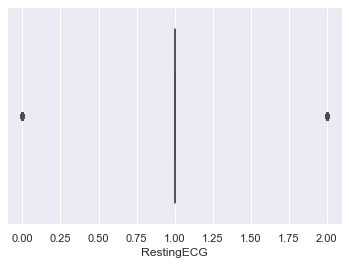

In [12]:
sns.boxplot(x = data.RestingECG)

<AxesSubplot:xlabel='ChestPainType'>

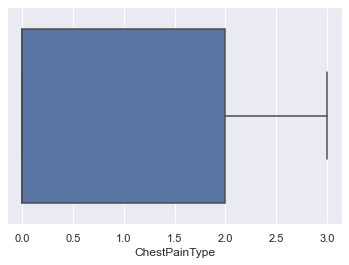

In [13]:
sns.boxplot(x = data.ChestPainType)

<AxesSubplot:xlabel='sex'>

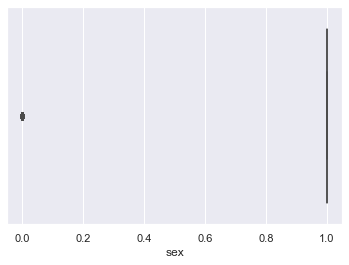

In [14]:
sns.boxplot(x = data.sex)

<AxesSubplot:xlabel='Oldpeak'>

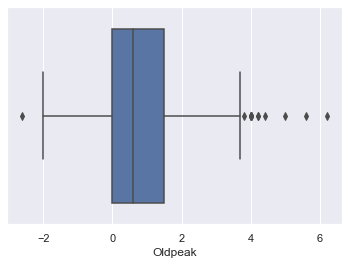

In [15]:
sns.boxplot(x = data.Oldpeak)

<AxesSubplot:xlabel='MaxHR'>

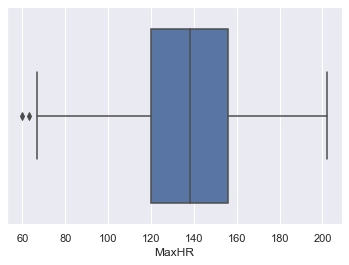

In [16]:
sns.boxplot(x = data.MaxHR)

<AxesSubplot:xlabel='FastingBS'>

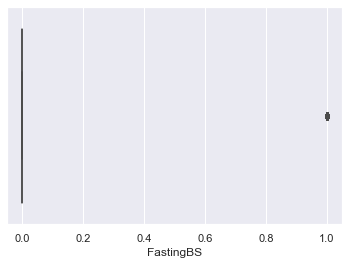

In [17]:
sns.boxplot(x = data.FastingBS)

<AxesSubplot:xlabel='RestingBP'>

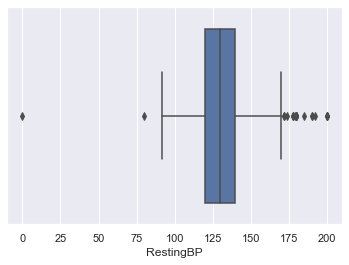

In [18]:
sns.boxplot(x = data.RestingBP)

<AxesSubplot:xlabel='Cholesterol'>

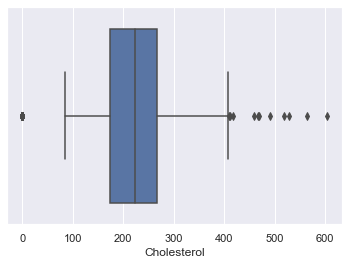

In [19]:
sns.boxplot(x = data.Cholesterol)

###### Insight: Outliers are present in Columns: Cholestrol, RestingBP, MaxHR, Oldpeak

#### Removing outliers using Z-Score method

In [20]:
z = np.abs(stats.zscore(data))
data = data[(z<3).all(axis=1)]
data.shape

(899, 12)

#### Correlation between data

Text(0.5, 1.0, 'Pearson Correlation')

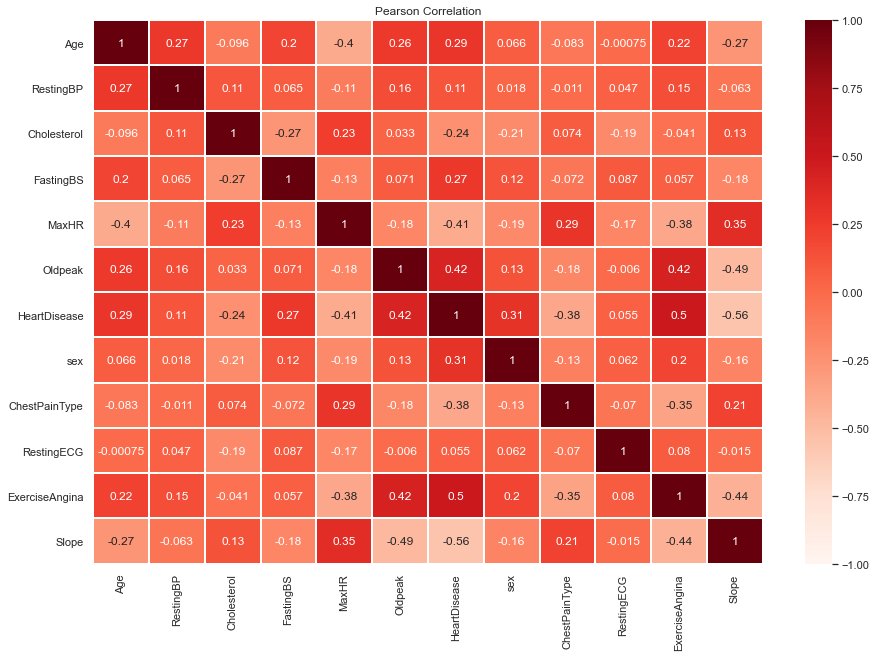

In [21]:
pearson_corr = data.corr(method = 'pearson')
spearsman_corr = data.corr(method = 'spearman')
fig = plt.subplots(figsize = (15,10))
sns.heatmap(pearson_corr, vmin=-1, vmax=1, cmap="Reds", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

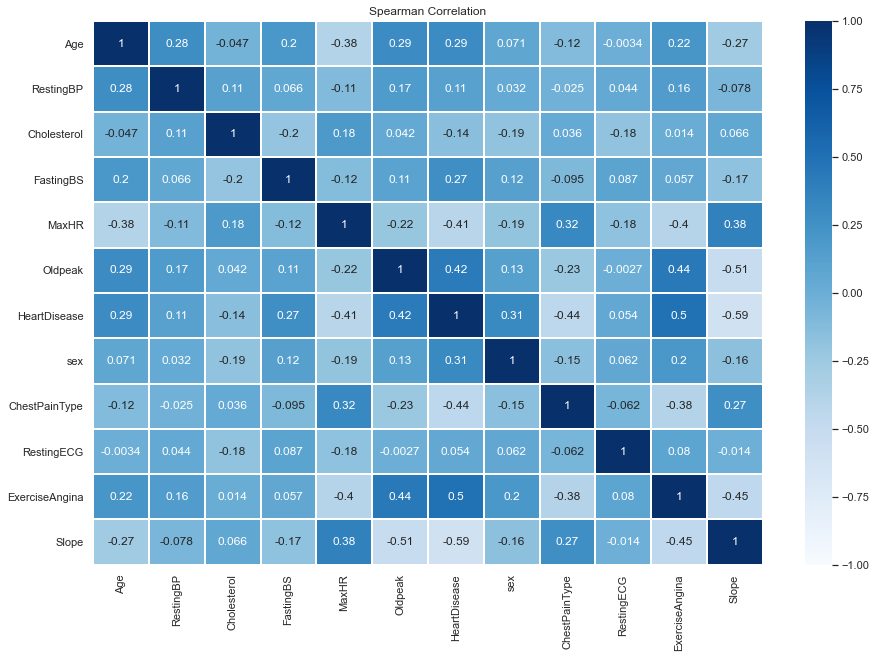

In [22]:
fig = plt.subplots(figsize = (15,10))
sns.heatmap(spearsman_corr, vmin=-1, vmax=1, cmap="Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

#### Feature Selection

In [23]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina',
       'Slope'],
      dtype='object')

In [24]:
x = data.drop(columns=['Cholesterol','MaxHR','HeartDisease','ChestPainType','RestingECG','Slope'], axis=1)
y = data['HeartDisease']
print(x.columns)
y.value_counts()

Index(['Age', 'RestingBP', 'FastingBS', 'Oldpeak', 'sex', 'ExerciseAngina'], dtype='object')


1    492
0    407
Name: HeartDisease, dtype: int64

#### Extracted information of Feature's
1. Age: Age of patients.
2. sex: Gender of patients. (1: Male, 0: Female)
3. ExerciseAngina: Exercise induced angina. (0: No, 1: Yes)
4. RestingBP: Resting Blood Pressure. (in mm Hg)
5. FastingBS: Fasting Blood sugar > 120 mg/dl. (1: True, 0: Otherwise)
6. OldPeak: Previous peak. [ST numeric value measured in depression]
7. HeartDisease: (1: Heavy chances, 0: Less chances)

#### Train/Test split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=3)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(899, 6) (629, 6) (270, 6)
(899,) (629,) (270,)


#### Model Training

In [26]:
model = LogisticRegression()
# Training model with training data
model.fit(x_train,y_train)

LogisticRegression()

#### Model Evaluation

In [27]:
# Accuracy on training data
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)
print('Accuracy score on training data:',training_data_accuracy)

Accuracy score on training data: 0.7885532591414944


In [28]:
# Accuracy on testing data
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred, y_test)
print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 0.7851851851851852


#### Predictive System for Heart Attack Analysis

###### Input format: ['Age', 'RestingBP', 'FastingBS', 'Oldpeak', 'sex', 'ExerciseAngina']

In [29]:
file = data[['Age', 'RestingBP', 'FastingBS', 'Oldpeak', 'sex', 'ExerciseAngina', 'HeartDisease']]
file.to_csv('Sample_input.csv')

In [30]:
sample_input = (48,138,0,1.5,0,1)
sample_input = np.asarray(sample_input)
sample_input = sample_input.reshape(1,-1)
prediction = model.predict(sample_input)

In [33]:
if prediction[0]==0:
    print('You are safe from heart attack.')
elif prediction[0]==1:
    print('You will have heart attack. Please check-up to the doctor!')

You will have heart attack. Please check-up to the doctor!


#### Model Extraction

In [32]:
pkl.dump(model,open('heart_model.pkl','wb'))